## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [10]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [11]:
train, test = keras.datasets.cifar10.load_data()

In [12]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = (x-127.5) / 127.5
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y   

In [13]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [15]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128,64,64,64,64,64,64]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [17]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

W0713 15:08:53.075599  3452 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 15:08:53.324599  3452 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 15:08:53.421600  3452 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 64)                4160      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 64)                4160      
__________

In [18]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [19]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0713 15:09:23.196599  3452 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0713 15:09:23.212599  3452 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [20]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0713 15:09:25.807600  3452 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0713 15:09:25.862599  3452 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 11s 210us/step - loss: 1.7692 - acc: 0.3687 - val_loss: 1.6078 - val_acc: 0.4309
Epoch 2/100
50000/50000 [==============================] - 10s 196us/step - loss: 1.5217 - acc: 0.4591 - val_loss: 1.4558 - val_acc: 0.4863
Epoch 3/100
50000/50000 [==============================] - 10s 195us/step - loss: 1.3969 - acc: 0.5070 - val_loss: 1.4118 - val_acc: 0.5031
Epoch 4/100
50000/50000 [==============================] - 10s 198us/step - loss: 1.3063 - acc: 0.5374 - val_loss: 1.3866 - val_acc: 0.5170
Epoch 5/100
50000/50000 [==============================] - 10s 205us/step - loss: 1.2333 - acc: 0.5661 - val_loss: 1.3848 - val_acc: 0.5144
Epoch 6/100
50000/50000 [==============================] - 11s 223us/step - loss: 1.1565 - acc: 0.5919 - val_loss: 1.3692 - val_acc: 0.5322
Epoch 7/100
50000/50000 [==============================] - 10s 194us/step - loss: 1.0872 - acc: 0.6153 - val_l

Epoch 59/100
50000/50000 [==============================] - 10s 192us/step - loss: 0.1127 - acc: 0.9627 - val_loss: 3.1067 - val_acc: 0.5271
Epoch 60/100
50000/50000 [==============================] - 10s 195us/step - loss: 0.1175 - acc: 0.9610 - val_loss: 3.0877 - val_acc: 0.5220
Epoch 61/100
50000/50000 [==============================] - 10s 195us/step - loss: 0.1052 - acc: 0.9651 - val_loss: 3.1311 - val_acc: 0.5262
Epoch 62/100
50000/50000 [==============================] - 10s 195us/step - loss: 0.1014 - acc: 0.9662 - val_loss: 3.1196 - val_acc: 0.5298
Epoch 63/100
50000/50000 [==============================] - 10s 199us/step - loss: 0.0988 - acc: 0.9676 - val_loss: 3.0983 - val_acc: 0.5261
Epoch 64/100
50000/50000 [==============================] - 10s 194us/step - loss: 0.1055 - acc: 0.9649 - val_loss: 3.1138 - val_acc: 0.5207
Epoch 65/100
50000/50000 [==============================] - 11s 213us/step - loss: 0.1025 - acc: 0.9662 - val_loss: 3.0971 - val_acc: 0.5250
Epoch 66/100


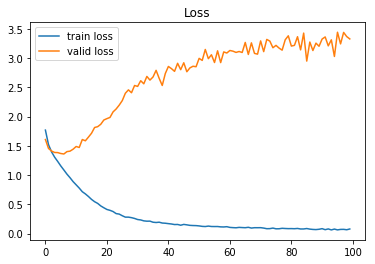

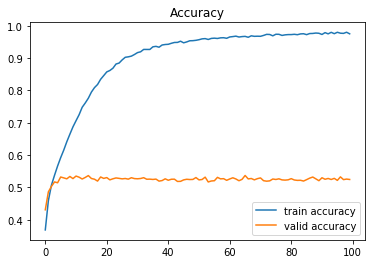

In [22]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()